# HandsOn Week 9
Welcome to HandsOn Week 9. In this HandsOn, you will try to play with spark streaming where the data is from a Kafka producer.

## Setting up
Since there SparkStreaming from Kafka is not supported in Spark version 3.1.1, There are some things that you need to setup or install:
1. You need to download apache spark version 2.7.4 with hadoop 2.7 [https://spark.apache.org/downloads.html]
2. Unzip the tgz file
3. Open bashrc file `nano ~/.bashrc`. Then, find those variables and set the values to
    * SPARK_HOME=~/Downloads/spark-2.4.7-bin-hadoop2.7
    * PYSPARK_PYTHON=python3.7
4. Activate `source ~/.bashrc`

## Milestone 1
You need to install kafka-python by ```pip install kafka-python```.<br><br>
In this milestone, you only need to run ```producer_variance.py``` and ```consumer_variance.py``` (these two code files are already provided inside the zip file).

Screenshot your ```consumer_variance.py``` output, and put in this cell below. 

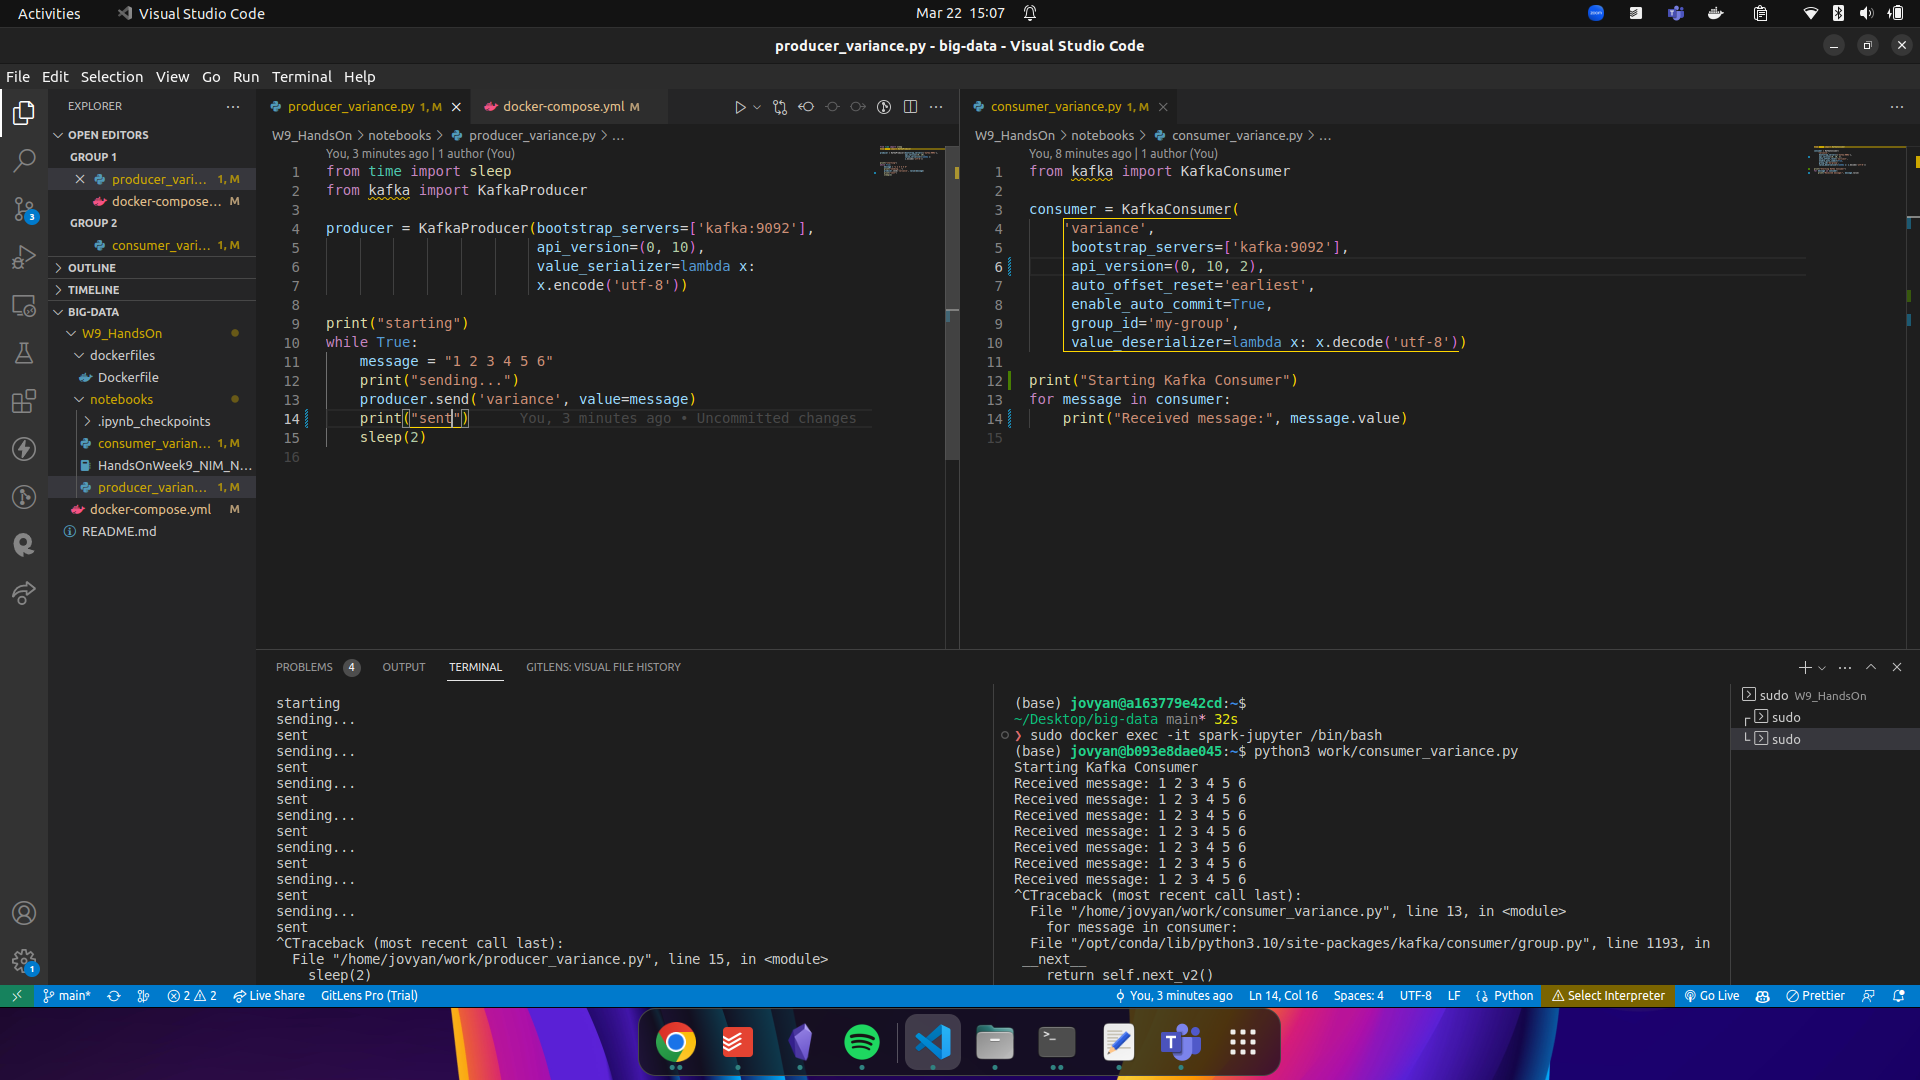

## Milestone 2
After making sure that the message is published by ```producer_variance.py``` and successfully consumed by ```consumer_variance.py``` in the topic of ```variance``` in the Milestone 1 above, then, you are ready for Milestone 2.<br>

In Milestone 2, you need to implement ```calculate_variance``` function with the formula --> $variance = \frac{\sum_{i=1}^{N}x_i^2}{N}-(\frac{\sum_{i=1}^{N}x_i}{N})^2$. This function will be used to calculate variance for each window operation to the streaming data, and the variance is "**accumulative/global**" value up to current stream data. For example, in the first window, we have data ```1,2,3```, then the variance is the variance of ```1,2,3```. Let's say we have streaming data of ```4,5,6``` in the second window, thus the variance in this second window is the variance of ```1,2,3,4,5,6```, and so on for the following windows.<br>

The ```calculate_variance``` function will return a DStream (RDD) with a format of ```('sum_x_square:', sum_x_square_value, 'sum_x:', sum_x_value, 'n:', n_value, 'var:', variance_value)``` where ```sum_x_square_value```$=\sum_{i=1}^{N}x_i^2$, ```sum_x_value```$=\sum_{i=1}^{N}x_i$ and ```n```$=N$. Note that $x_i=$ i-th of individual stream data, and $N=$ the number of individual stream data -count- up to i-th data.

**Important:** In order to stream from Kafka producer to Spark Streaming, you need to download [spark-streaming-kafka-0-8-assembly_2.11-2.4.7.jar](https://mvnrepository.com/artifact/org.apache.spark/spark-streaming-kafka-0-8-assembly_2.11/2.4.7) from maven repository (adjust with your Spark version), and put this jar file to ```your_spark_folder/jars```. For VM provided by the class, ```spark_folder``` is in ```/home/bigdata/spark-2.4.5-bin-hadoop2.7```.

In [2]:
from pyspark.streaming import StreamingContext
import KafkaUtils

KAFKA_TOPIC = "variance"
BOOTSTRAP_SERVER = "kafka:9092"

ssc = StreamingContext(sc,1) #stream each one second
ssc.checkpoint("./checkpoint")
lines = KafkaUtils.createDirectStream(ssc, [KAFKA_TOPIC],
                                      {"metadata.broker.list": BOOTSTRAP_SERVER})

def calculate_variance(lines, window_length = 2, sliding_interval = 2):
    """
    Function to calculate "accumulated/global variance" in each window operation
    Params:
        lines: Spark DStream defined above (in this jupyter cell)
        window_length: length of window in windowing operation
        sliding_interval: sliding interval for the window operation
    Return:
        result: DStream (RDD) of variance result with 
                format --> ('sum_x_square:', sum_x_square_value, 'sum_x:', sum_x_value, 'n:', n_value, 'var:', variance_value)
                Example:   ('sum_x_square:', 182.0, 'sum_x:', 42.0, 'n:', 12.0, 'var:', 2.916666666666666)
    """
    # Realize this function here. Note that you are not allowed to modify any code other than this function.
    
    return result

# run the function
result = calculate_variance(lines, window_length=2, sliding_interval=2)
# Print
result.pprint()
ssc.start()
ssc.awaitTermination()

ModuleNotFoundError: No module named 'KafkaUtils'

## Submission
Archive this ipynb file and the screenshot image needed in the Milestone 1 into zip file with a format of: ```HandsOnWeek11_NIM_FullName.zip```, and submit to the submission form.

**Note**: make sure in the Milestone 2, the cell has its output, but not too many streams (you can save this ipynb file approximatelly in the range of 4-20 window operations)

Enjoy...